# A ideia aqui será buscar os dados das ações que compões o Indice Bovespa e classificá-las em ordem decrescente quanto ao pagamento de dividendos no ano de 2022. Contudo, os dados extraídos da base de dados, não apresenta o setor de atuação das empresas que compõem o índice. Assim, será feito uma junção da base de dados de dividendos e a base de dados do setor de atuação das ações para sabermos quais os setores da economia pagam os melhores dividendos.






In [1]:
#O primeiro passo é instalar a base de dados Yahoo Finance, que disponibiliza os dados que precisamos, o Pandas, Seaborn e Matplotlib 

!pip install yfinance

In [2]:
!pip install pandas


In [3]:
!pip install seaborn
!pip install matplotlib

In [1]:
# Agora precisamos importar as bibliotecas "pandas" e "yfanance"
import pandas as pd
import yfinance as yf #esta biblioteca nos fornecerá o histórico de preço dos ativos e os dividendos pagos.
# Neste momento precisamos entrar no site da B3 e baixar a lista das empresas que compõem o Ibovespa, disponível em 
#https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm
#Para a leitura da tabela baixada, utiliza0se o seguinte comando:
pd.set_option('display.max_rows', None)
symbol_list_ibov = list(pd.read_excel('C:/IBOV.xlsx')['Codigo'].values)
symbol_list_ibov

#A ideia aqui é agrupar os dados por ano para conseguirmos entender quais as empresas pagaram, nos últimos 2 anos, os maiores dividend yelds, que é o quanto está sendo pago dividendo em relação ao preço daquela ação. 
# Essa é uma das formas para que possamos analisar os dividendos de forma padronizada. 

['WEGE3',
 'EMBR3',
 'AZUL4',
 'CCRO3',
 'GOLL4',
 'RAIL3',
 'BRFS3',
 'JBSS3',
 'MRFG3',
 'BEEF3',
 'SMTO3',
 'ABEV3',
 'ASAI3',
 'CRFB3',
 'PCAR3',
 'NTCO3',
 'RAIZ4',
 'SLCE3',
 'ARZZ3',
 'SOMA3',
 'LREN3',
 'MGLU3',
 'PETZ3',
 'VIIA3',
 'ALPA4',
 'CYRE3',
 'EZTC3',
 'MRVE3',
 'CVCB3',
 'COGN3',
 'RENT3',
 'YDUQ3',
 'ALSO3',
 'IGTI11',
 'MULT3',
 'BBDC3',
 'BBDC4',
 'BBAS3',
 'BPAC11',
 'ITSA4',
 'ITUB4',
 'SANB11',
 'BBSE3',
 'IRBR3',
 'B3SA3',
 'CIEL3',
 'DXCO3',
 'KLBN11',
 'SUZB3',
 'BRAP4',
 'CMIN3',
 'VALE3',
 'BRKM5',
 'GGBR4',
 'GOAU4',
 'CSNA3',
 'USIM5',
 'RRRP3',
 'CSAN3',
 'PETR3',
 'PETR4',
 'PRIO3',
 'UGPA3',
 'VBBR3',
 'HYPE3',
 'RADL3',
 'FLRY3',
 'HAPV3',
 'RDOR3',
 'LWSA3',
 'CASH3',
 'TOTS3',
 'VIVT3',
 'TIMS3',
 'SBSP3',
 'CMIG4',
 'CPLE6',
 'CPFE3',
 'ELET3',
 'ELET6',
 'ENBR3',
 'ENGI11',
 'ENEV3',
 'EGIE3',
 'EQTL3',
 'TAEE11']

In [2]:
# Feito isso, agora temos que encontrar uma forma de descobrir osdividendos pagos pelas empresas. Para tanto,
#encontrei o comando abaixo para encontrar estes dividendos de forma automatizada. 
#Este comando demora aproximadamente 2 mins para ser finalizado e pode ser encontrado em: https://github.com/mnchamma/investirnapratica/blob/main/20_maiores_pagadoras.ipynb
# No exemplo, o autor utiliza o índice IBRX100, que são as 100 maiores emrpresas da bolsa brasileira, mas optei por utilizar 
# o índice bovespa (IBOV) por ser o mais utilizado no mercado. Para fins didáticos, farei uma breve interpretação na frente 
#de cada uma das linhas descritas no comando

In [3]:
df_scan = pd.DataFrame() #Preciso definir um dataframe nomeado de "scan". Ele será o nosso produto final, que vai ranquear as empresas do IBOV em relação ao Dividend Yield nos anos de 2021 e 2022
for ativo in symbol_list_ibov:
    df2 =pd.DataFrame()
    chamada_api = yf.Ticker(ativo+'.SA')
    closes = chamada_api.history(period='36mo')['Close'].values #Esta linha isola os dados de cada ativo para que seja analisado apenas o preço de fechamento da empresa. 
    dividendos = chamada_api.history(period='36mo')['Dividends'].values #o mesmo se faz com os dividendos 
    datas = list(chamada_api.history(period='36mo').index) # e o mesmo se faz com as datas
    

    df2['Closes'] = closes # Neste momento criamos um segundo data frame (df2) para colocar as datas como um index deste dataframe
    df2['Dividendos'] = dividendos
    df2['Datas'] = datas
    df2 = df2.set_index('Datas',drop = True)

    soma_dividendos = 0 # a ideia aqui é definir um contador/acumulador para poder somar os anos de 2021 e 2022 para que com isso eu consiga acumular os valores pagos em dividendos nos últimos 2 anos.   

    for k,v in df2.iterrows():
        if k.year == 2021 or k.year == 2022:
            soma_dividendos += v['Dividendos']
    
    dividend_yield = ((soma_dividendos/2) / df2['Closes'].values[-1] )*100 # aqui égamos os dividendos pagos nos últimos 2 anos, dividimos por 2 para saber a média e dividimos o resultado pelo preço de fechamento da ação no dia anterior ao pagamento de dividendos. Isso ocorre pois no dia do pagamento de dividendos, as ações são corrigidas para baixo, ou seja, se a empresa pagou R$0,50 em dividendos, as ações caem R$0,50 no dia do pagamento destes dividendos. Por isso usamos o d-1. O resultado é multiplicado por 100 para termos um resultado em porcentagem.  

    df_scan[ativo] = [dividend_yield]

df_scan.transpose().sort_values(by = 0,ascending=False) #aqui vamos finalizar mostrando as ações em ordem descrescente em termos de dividend yield

,0
MRFG3,47.526015
PETR4,37.807545
PETR3,33.653367
BRAP4,30.287903
BRKM5,20.266489
CSNA3,18.509116
VALE3,17.141003
JBSS3,17.057880
CMIN3,16.863289
GOAU4,14.752066


In [4]:
# Precisamos agora baixar a 2ª base de dados que mostra qual o setor da economia pertence cada uma das ações. Para tanto
# vamos entrar no site da B3 e baixar a lista das empresas que compõem o Ibovespa, disponível em 
#https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm
#Em "Consulta por" selecionamos "Por setor de atuação". Para a leitura da tabela, usamos o comando abaixo:

In [5]:
setor_list_ibov = list(pd.read_excel('C:/IBOV_setor.xlsx'))
display(setor_list_ibov)

['Setor',
 'Codigo',
 'Ação',
 'Tipo',
 'Qtde. Teórica',
 'Part. (%)',
 'Part. (%)Acum.']

In [6]:
setor_list_ibov = pd.read_excel('C:/IBOV_setor.xlsx')
display(setor_list_ibov)

,Setor,Codigo,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1260665218,2.326,2.326
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734632205,0.706,0.706
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327646296,0.308,2.454
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,998462635,0.697,2.454
4,Bens Indls/Transporte,GOLL4,GOL,PN N2,218221868,0.112,2.454
5,Bens Indls/Transporte,RAIL3,RUMO S.A.,ON NM,1215642613,1.337,2.454
6,Cons N Básico / Alimentos Processados,BRFS3,BRF SA,ON NM,1076512610,0.467,1.969
7,Cons N Básico / Alimentos Processados,JBSS3,JBS,ON NM,1134986483,0.998,1.969
8,Cons N Básico / Alimentos Processados,MRFG3,MARFRIG,ON NM,292587273,0.104,1.969
9,Cons N Básico / Alimentos Processados,BEEF3,MINERVA,ON NM,260340982,0.139,1.969


# Agora precisamos fazer um "merge" para juntar os dados que estão tanto na tabela 1 quanto na tabela 2


In [7]:
display(setor_list_ibov) #Tabela 2
tabela_dividendos = df_scan.transpose().sort_values(by = 0,ascending=False) #Tabela 1
display(tabela_dividendos)

,Setor,Codigo,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1260665218,2.326,2.326
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734632205,0.706,0.706
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327646296,0.308,2.454
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,998462635,0.697,2.454
4,Bens Indls/Transporte,GOLL4,GOL,PN N2,218221868,0.112,2.454
5,Bens Indls/Transporte,RAIL3,RUMO S.A.,ON NM,1215642613,1.337,2.454
6,Cons N Básico / Alimentos Processados,BRFS3,BRF SA,ON NM,1076512610,0.467,1.969
7,Cons N Básico / Alimentos Processados,JBSS3,JBS,ON NM,1134986483,0.998,1.969
8,Cons N Básico / Alimentos Processados,MRFG3,MARFRIG,ON NM,292587273,0.104,1.969
9,Cons N Básico / Alimentos Processados,BEEF3,MINERVA,ON NM,260340982,0.139,1.969


,0
MRFG3,47.526015
PETR4,37.807545
PETR3,33.653367
BRAP4,30.287903
BRKM5,20.266489
CSNA3,18.509116
VALE3,17.141003
JBSS3,17.057880
CMIN3,16.863289
GOAU4,14.752066


In [8]:
display(setor_list_ibov) #Tabela 2
tabela_dividendos = df_scan.transpose().sort_values(by = 0,ascending=False) #Tabela 1
display(tabela_dividendos)

,Setor,Codigo,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1260665218,2.326,2.326
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734632205,0.706,0.706
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327646296,0.308,2.454
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,998462635,0.697,2.454
4,Bens Indls/Transporte,GOLL4,GOL,PN N2,218221868,0.112,2.454
5,Bens Indls/Transporte,RAIL3,RUMO S.A.,ON NM,1215642613,1.337,2.454
6,Cons N Básico / Alimentos Processados,BRFS3,BRF SA,ON NM,1076512610,0.467,1.969
7,Cons N Básico / Alimentos Processados,JBSS3,JBS,ON NM,1134986483,0.998,1.969
8,Cons N Básico / Alimentos Processados,MRFG3,MARFRIG,ON NM,292587273,0.104,1.969
9,Cons N Básico / Alimentos Processados,BEEF3,MINERVA,ON NM,260340982,0.139,1.969


,0
MRFG3,47.526015
PETR4,37.807545
PETR3,33.653367
BRAP4,30.287903
BRKM5,20.266489
CSNA3,18.509116
VALE3,17.141003
JBSS3,17.057880
CMIN3,16.863289
GOAU4,14.752066


In [9]:

tabela_dividendos = df_scan.transpose() #Tabela 1


In [10]:
tabela_dividendos

,0
WEGE3,1.272269
EMBR3,0.000000
AZUL4,0.000000
CCRO3,1.992012
GOLL4,0.000000
RAIL3,0.043058
BRFS3,0.000000
JBSS3,17.057880
MRFG3,47.526015
BEEF3,8.060053


In [11]:
tabela_dividendos.index

Index(['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'GOLL4', 'RAIL3', 'BRFS3', 'JBSS3',
       'MRFG3', 'BEEF3', 'SMTO3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3',
       'RAIZ4', 'SLCE3', 'ARZZ3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3',
       'ALPA4', 'CYRE3', 'EZTC3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'YDUQ3',
       'ALSO3', 'IGTI11', 'MULT3', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11',
       'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'B3SA3', 'CIEL3', 'DXCO3',
       'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4',
       'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3',
       'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'RDOR3', 'LWSA3', 'CASH3',
       'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3',
       'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11'],
      dtype='object')

In [12]:
#Juntando as duas tabelas:


In [13]:
df_merge = setor_list_ibov.join(
    other=tabela_dividendos,
    on="Codigo"
    )
df_merge

,Setor,Codigo,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.,0
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1260665218,2.326,2.326,1.272269
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734632205,0.706,0.706,0.000000
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327646296,0.308,2.454,0.000000
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,998462635,0.697,2.454,1.992012
4,Bens Indls/Transporte,GOLL4,GOL,PN N2,218221868,0.112,2.454,0.000000
5,Bens Indls/Transporte,RAIL3,RUMO S.A.,ON NM,1215642613,1.337,2.454,0.043058
6,Cons N Básico / Alimentos Processados,BRFS3,BRF SA,ON NM,1076512610,0.467,1.969,0.000000
7,Cons N Básico / Alimentos Processados,JBSS3,JBS,ON NM,1134986483,0.998,1.969,17.057880
8,Cons N Básico / Alimentos Processados,MRFG3,MARFRIG,ON NM,292587273,0.104,1.969,47.526015
9,Cons N Básico / Alimentos Processados,BEEF3,MINERVA,ON NM,260340982,0.139,1.969,8.060053


In [14]:
#Alterando o nome da última coluna, que está com o nome "0" para o nome correto "Dividend Yield". ALém disso, vamos
#filtrar os dados da tabela para melhor visualizarmos os dados necessários (Setor, Codigo e DY)

In [15]:
df_merge.columns = [         'Setor',         'Codigo',           'Ação',           'Tipo',
        'Qtde. Teórica',      'Part. (%)', 'Part. (%)Acum.',                'Dividend Yield']
filtered_df = df_merge[['Setor', 'Codigo', 'Dividend Yield']] 
filtered_df

,Setor,Codigo,Dividend Yield
0,Bens Indls / Máqs e Equips,WEGE3,1.272269
1,Bens Indls / Mat Transporte,EMBR3,0.000000
2,Bens Indls/Transporte,AZUL4,0.000000
3,Bens Indls/Transporte,CCRO3,1.992012
4,Bens Indls/Transporte,GOLL4,0.000000
5,Bens Indls/Transporte,RAIL3,0.043058
6,Cons N Básico / Alimentos Processados,BRFS3,0.000000
7,Cons N Básico / Alimentos Processados,JBSS3,17.057880
8,Cons N Básico / Alimentos Processados,MRFG3,47.526015
9,Cons N Básico / Alimentos Processados,BEEF3,8.060053


In [16]:
filtered_df.sort_values('Dividend Yield', ascending=False)

,Setor,Codigo,Dividend Yield
8,Cons N Básico / Alimentos Processados,MRFG3,47.526015
60,Petróleo/ Gás e Biocombustíveis,PETR4,37.807545
59,Petróleo/ Gás e Biocombustíveis,PETR3,33.653367
49,Mats Básicos / Mineração,BRAP4,30.287903
52,Mats Básicos / Químicos,BRKM5,20.266489
55,Mats Básicos / Sid Metalurgia,CSNA3,18.509116
51,Mats Básicos / Mineração,VALE3,17.141003
7,Cons N Básico / Alimentos Processados,JBSS3,17.057880
50,Mats Básicos / Mineração,CMIN3,16.863289
54,Mats Básicos / Sid Metalurgia,GOAU4,14.752066


In [17]:
#Agora vamos plotar os resultados estatísticos

In [18]:
df_merge.describe()

,Qtde. Teórica,Part. (%),Part. (%)Acum.,Dividend Yield
count,8.600000e+01,86.000000,86.000000,86.000000
mean,1.114397e+09,1.162791,6.009744,6.204525
std,1.312956e+09,1.861291,6.372786,8.576063
min,6.075833e+07,0.031000,0.061000,0.000000
25%,2.750293e+08,0.253750,1.298000,0.863352
50%,6.867911e+08,0.571500,2.454000,4.036111
75%,1.198073e+09,1.045000,10.686000,6.684023
max,5.733398e+09,13.237000,19.681000,47.526015


In [19]:
#O principal dado deste trabalho é o Dividend Yield. Dessa forma fazer a análise estatística dos resultados encontrados: 
# 1 - Temos 86 ações listadas no IBOV
# 2 - A média de DY das ações listadas é de 6,2045, com desvio padrão de 8,5760
# 3 - 12 ações não pagaram nenhum dividendo nos anos de análise
# 4 - A Marfrig, pertencente ao setor de Consumo N Ciclico/ALimentos processados, foi a empresa que obteve um maior DY (47,5260)

#Abaixo vamos verificar o quantitativo de ações separadas por setor

In [20]:
df_merge['Setor'].value_counts()

Utilidade Públ / Energ Elétrica                      11
Petróleo/ Gás e Biocombustíveis                       7
Financ e Outros / Interms Financs                     7
Consumo Cíclico / Comércio                            6
Cons N  Básico / Alimentos Processados                5
Bens Indls/Transporte                                 4
Mats Básicos / Sid Metalurgia                         4
Mats Básicos / Madeira e Papel                        3
Cons N Cíclico / Comércio Distr.                      3
Tec.Informação/Programas Servs                        3
Saúde/SM Hosp An.Diag                                 3
Consumo Cíclico/Constr Civil                          3
Diversos                                              3
Financ e Outros / Explor Imóveis                      3
Mats Básicos / Mineração                              3
Telecomunicação                                       2
Saúde/Comércio Distr.                                 2
Financ e Outros / Previd  Seguros               

In [21]:
media_setor = df_merge.groupby('Setor')['Dividend Yield'].mean()


In [22]:
df_merge.groupby('Setor')['Dividend Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
Setor,,,,,,,,
Bens Indls / Mat Transporte,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
Bens Indls / Máqs e Equips,1.0,1.272269,NaN,1.272269,1.272269,1.272269,1.272269,1.272269
Bens Indls/Transporte,4.0,0.508767,0.989038,0.000000,0.000000,0.021529,0.530296,1.992012
Cons N Básico / Alimentos Processados,5.0,15.564190,18.909252,0.000000,5.177000,8.060053,17.057880,47.526015
Cons N Ciclico/Agropecuária,2.0,3.240877,1.410643,2.243402,2.742139,3.240877,3.739614,4.238352
Cons N Cíclico / Bebidas,1.0,4.863790,NaN,4.863790,4.863790,4.863790,4.863790,4.863790
Cons N Cíclico / Comércio Distr.,3.0,4.766382,3.278646,1.002351,3.649610,6.296868,6.648398,6.999927
Cons N Cíclico / Pr Pessoal Limp,1.0,0.396571,NaN,0.396571,0.396571,0.396571,0.396571,0.396571
Consumo Cíclico / Comércio,6.0,0.945761,1.108513,0.000000,0.279279,0.446873,1.367104,2.883558


In [23]:
# Para fazer uma análise visual mais limpa dos dados acima, será plotado um gráfico de pizza

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

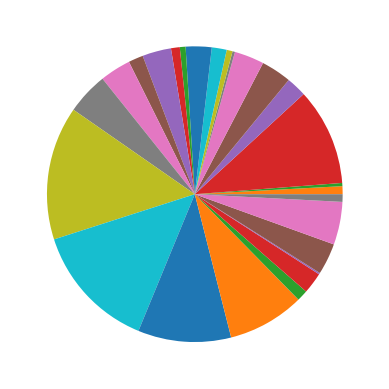

In [25]:
plt.pie(df_merge.groupby('Setor')['Dividend Yield'].mean())
plt.show()

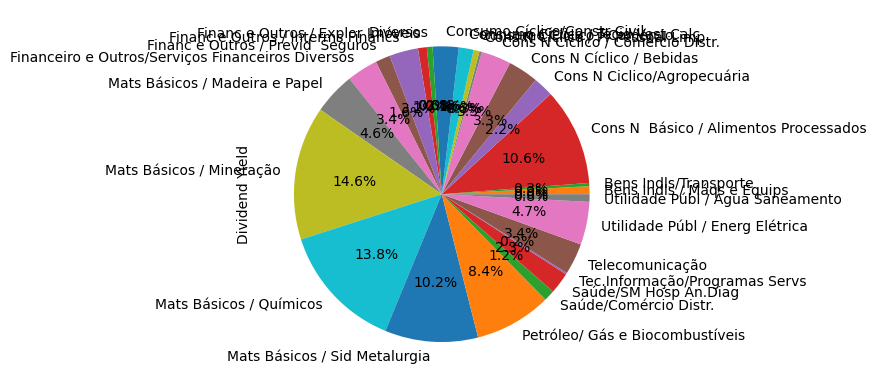

In [26]:
g1 = media_setor.plot(kind='pie', autopct='%1.1f%%')

# Verificou-se que os setores que mais pagam dividendos, em média são: Mineração, Quimicos, Sid Metalurgia, Alimentos processados e Biocombustiveis
# Dois setores não pagaram dividendos: Bens Indls / Mat Transporte e Consumo Cíclico/Viagens e Lazer



In [27]:
# Vamos agora fazer rodar um modelo de aprendizado de máquina para testar nossa base. A ideia aqui é responder à pergunta: 
# Caso tenhamos uma ação aleatória do IBOV e tivéssemos apenas os dados 'Qtde. Teórica','Part. (%)','Part. (%)Acum.', 'Dividend Yield'
#Será que conseguimos prever em qual setor esta ação estaria enquadrada? 
# Para tanto vamos instalar o sklearn e importar o SVM e o Linear Model

In [28]:
!pip install sklearn

In [29]:
from sklearn import svm
from sklearn import linear_model

In [30]:
df_merge

,Setor,Codigo,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.,Dividend Yield
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1260665218,2.326,2.326,1.272269
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734632205,0.706,0.706,0.000000
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327646296,0.308,2.454,0.000000
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,998462635,0.697,2.454,1.992012
4,Bens Indls/Transporte,GOLL4,GOL,PN N2,218221868,0.112,2.454,0.000000
5,Bens Indls/Transporte,RAIL3,RUMO S.A.,ON NM,1215642613,1.337,2.454,0.043058
6,Cons N Básico / Alimentos Processados,BRFS3,BRF SA,ON NM,1076512610,0.467,1.969,0.000000
7,Cons N Básico / Alimentos Processados,JBSS3,JBS,ON NM,1134986483,0.998,1.969,17.057880
8,Cons N Básico / Alimentos Processados,MRFG3,MARFRIG,ON NM,292587273,0.104,1.969,47.526015
9,Cons N Básico / Alimentos Processados,BEEF3,MINERVA,ON NM,260340982,0.139,1.969,8.060053


In [31]:
df_merge


,Setor,Codigo,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.,Dividend Yield
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1260665218,2.326,2.326,1.272269
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734632205,0.706,0.706,0.000000
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327646296,0.308,2.454,0.000000
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,998462635,0.697,2.454,1.992012
4,Bens Indls/Transporte,GOLL4,GOL,PN N2,218221868,0.112,2.454,0.000000
5,Bens Indls/Transporte,RAIL3,RUMO S.A.,ON NM,1215642613,1.337,2.454,0.043058
6,Cons N Básico / Alimentos Processados,BRFS3,BRF SA,ON NM,1076512610,0.467,1.969,0.000000
7,Cons N Básico / Alimentos Processados,JBSS3,JBS,ON NM,1134986483,0.998,1.969,17.057880
8,Cons N Básico / Alimentos Processados,MRFG3,MARFRIG,ON NM,292587273,0.104,1.969,47.526015
9,Cons N Básico / Alimentos Processados,BEEF3,MINERVA,ON NM,260340982,0.139,1.969,8.060053


In [32]:
#Assim, temos as variáveis de entrada (X) que são:'Qtde.Teórica','Part. (%)','Part. (%)Acum.', 'Dividend Yield' 
#e a variável resposta (Y) que é o 'Setor'

In [33]:
X = df_merge[['Qtde. Teórica','Part. (%)','Part. (%)Acum.', 'Dividend Yield']].values
Y = df_merge['Setor']
X

array([[1.26066522e+09, 2.32600000e+00, 2.32600000e+00, 1.27226893e+00],
       [7.34632205e+08, 7.06000000e-01, 7.06000000e-01, 0.00000000e+00],
       [3.27646296e+08, 3.08000000e-01, 2.45400000e+00, 0.00000000e+00],
       [9.98462635e+08, 6.97000000e-01, 2.45400000e+00, 1.99201184e+00],
       [2.18221868e+08, 1.12000000e-01, 2.45400000e+00, 0.00000000e+00],
       [1.21564261e+09, 1.33700000e+00, 2.45400000e+00, 4.30575378e-02],
       [1.07651261e+09, 4.67000000e-01, 1.96900000e+00, 0.00000000e+00],
       [1.13498648e+09, 9.98000000e-01, 1.96900000e+00, 1.70578804e+01],
       [2.92587273e+08, 1.04000000e-01, 1.96900000e+00, 4.75260153e+01],
       [2.60340982e+08, 1.39000000e-01, 1.96900000e+00, 8.06005301e+00],
       [1.43294210e+08, 2.61000000e-01, 1.96900000e+00, 5.17699954e+00],
       [4.38665251e+09, 3.25000000e+00, 3.25000000e+00, 4.86378964e+00],
       [1.19082443e+09, 7.98000000e-01, 1.23300000e+00, 1.00235098e+00],
       [5.28743156e+08, 3.00000000e-01, 1.23300000e

In [34]:
Y = df_merge['Setor']

In [35]:
reg = svm.SVC()
#reg = linear_model.BayesianRidge()
reg.fit(X,Y)

SVC()

In [36]:
#Basta agora inserirmos valores das variáveis de entrada mencionadas acima, de ações da bolsa que não compoem o IBOV e 
#verificar qual o setor de atuação previsto pelo modelo. 

In [37]:
reg.predict([[2, 1, 3, 4]])[0]

'Utilidade Públ / Energ Elétrica'

In [38]:
# No caso acima, o modelo previu que a ação aleatória é do setor de Utilidade Publica/Energ Elétrica